<a href="https://colab.research.google.com/github/mjalalimanesh/statistical-learning-ISLR-python/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ISLR book**

https://github.com/mjalalimanesh/statistical-learning-ISLR-python

**Chapter 4 Lab : Logistic Regression, LDA, QDA, and KNN**

Import libraries

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 4.6.1 The Stock market data

In [3]:
# load data
smarket = pd.read_csv('https://raw.githubusercontent.com/mjalalimanesh/statistical-learning-ISLR-python/master/datasets/Smarket.csv', index_col=0)
smarket.Direction = smarket.Direction.astype('category')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
smarket.shape

(1250, 9)

In [6]:
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [7]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.3 KB


In [ ]:
sns.pairplot(smarket, hue='Direction');

In [9]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


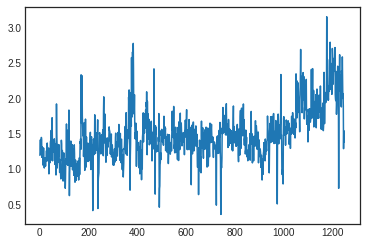

In [10]:
plt.plot(smarket.Volume);

## 4.6.2 Logistic Regression

### Using statsmodels

In [38]:
X_sm = smarket.loc[:,'Lag1':'Volume']
y_sm_1 = pd.get_dummies(smarket.Direction).iloc[:, 1] # dummy encoding
y_sm = preprocessing.LabelEncoder().fit_transform(smarket.Direction)
print((y_sm.dtype))
print((y_sm_1.dtype))
glm_fit_sm = sm.Logit(y_sm, sm.add_constant(X_sm)).fit()
print(glm_fit_sm.summary2())

int64
uint8
Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: y                AIC:              1741.5841
Date:               2020-11-11 05:56 BIC:              1777.5004
No. Observations:   1250             Log-Likelihood:   -863.79  
Df Model:           6                LL-Null:          -865.59  
Df Residuals:       1243             LLR p-value:      0.73187  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.1260     0.2407   -0.5234   0.6007   -0.5978   0.3458
Lag1      -0.0731     0.0502   -1.4566   0.1452   -0.1714 

In [37]:
glm_fit_sm.params

const    -0.126000
Lag1     -0.073074
Lag2     -0.042301
Lag3      0.011085
Lag4      0.009359
Lag5      0.010313
Volume    0.135441
dtype: float64

In [43]:
glm_fit_sm.predict()[0:5]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116])

In [45]:
glm_fit_sm_pred = glm_fit_sm.predict() >= 0.5

In [42]:
glm_fit_sm.pred_table()

array([[145., 457.],
       [141., 507.]])

In [46]:
np.mean(glm_fit_sm_pred == y_sm)

0.5216

### Using scikit-learn

In [78]:
from sklearn.linear_model import LogisticRegression

X_sk = smarket.loc[:,'Lag1':'Volume']
y_sk = smarket.Direction

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit = glm_model.fit(X_sk, y_sk)

In [49]:
glm_fit.intercept_, glm_fit.coef_

(array([-0.12600781]),
 array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
          0.13544567]]))

In [54]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:, 0], 
              'prob_1': glm_fit.predict_proba(X_sk)[:, 1], 
              'pred_class': glm_fit.predict(X_sk)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.492916,0.507084,Up
1,0.518533,0.481467,Down
2,0.518861,0.481139,Down
3,0.484778,0.515222,Up
4,0.489219,0.510781,Up
...,...,...,...
1245,0.480107,0.519893,Up
1246,0.494075,0.505925,Up
1247,0.460732,0.539268,Up
1248,0.473882,0.526118,Up


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

# labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [70]:
print('Train Accuracy: ' + str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error: ' + str(1 - accuracy_score(y_sk, glm_fit.predict(X_sk))))

Train Accuracy: 0.5176
Training Error: 0.48240000000000005


In [59]:
# separate training and test sets
train = smarket.loc[smarket.Year < 2005]
smarket_2005 = smarket.loc[smarket.Year >= 2005]

In [68]:
X_sk_train = train.loc[:,'Lag1':'Volume']
y_sk_train = train.Direction

X_sk_test = smarket_2005.loc[:,'Lag1':'Volume']
y_sk_test = smarket_2005.Direction

glm_model_t = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t = glm_model.fit(X_sk_train, y_sk_train)

In [61]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test, glm_fit.predict(X_sk_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,77,34
1,97,44


In [69]:
print('Test Accuracy: ' + str(accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))

Test Accuracy: 0.4801587301587302
Test Error: 0.5198412698412698


In [73]:
X_sk_train_s = train.loc[:,'Lag1':'Lag2']
y_sk_train_s = train.Direction

X_sk_test_s = smarket_2005.loc[:,'Lag1':'Lag2']
y_sk_test_s = smarket_2005.Direction

glm_model_t_s = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t_s = glm_model.fit(X_sk_train_s, y_sk_train_s)

In [64]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test_s, glm_fit.predict(X_sk_test_s)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [66]:
print('Test Accuracy: ' + str(accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))

Test Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


In [76]:
# predictions for arbitrary data

predict_data = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})

df = pd.DataFrame(glm_fit.predict_proba(predict_data))
df.columns = ['pred_0', 'pred_1']
df

,pred_0,pred_1
0,0.520854,0.479146
1,0.503889,0.496111


## 4.6.3 Linear Discriminant Analysis

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [82]:
df = pd.DataFrame(lda_fit.priors_.reshape((1,2))) # group priors
df.columns = ['Down', 'Up']
df

,Down,Up
0,0.491984,0.508016


In [86]:
df = pd.DataFrame(lda_fit.means_) # group means
df.columns = ['Lag1', 'Lag2']
df.index = ['Down', 'Up']
df

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [87]:
lda_fit.scalings_ # coefficients of ld

array([[-0.64201904],
       [-0.51352928]])

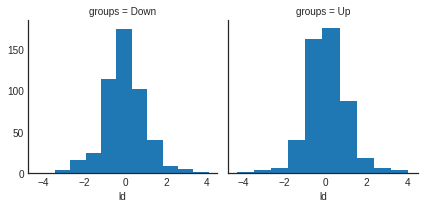

In [88]:
# for plotting lda, needs imporovement
ld_sc = X_train.iloc[:, 0] * lda_fit.scalings_[0] + X_train.iloc[:, 1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'ld': ld_sc})

g = sns.FacetGrid(ld, col='groups')
g.map(plt.hist, 'ld');